In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
import json

#url = "https://api.eia.gov/v2/petroleum/pri/gnd/data/?frequency=weekly&data[0]=value&facets[product][]=EPD2D&facets[product][]=EPM0&facets[product][]=EPMR&facets[duoarea][]=NUS&start=2020-01-01&sort[0][column]=period&sort[0][direction]=desc&sort[1][column]=product&sort[1][direction]=asc&offset=0&length=5000"

#query_url = f"{url}&api_key={api_key}"

#data_file = requests.get(query_url).json()

#data_file
running_data = []
#make an API call with the parameter offset (st-end)
for offset in range(0,87823,5000):
    url = f"https://api.eia.gov/v2/petroleum/pri/gnd/data/?frequency=weekly&data[0]=value&facets[product][]=EPD2D&facets[product][]=EPM0&facets[product][]=EPMR&facets[duoarea][]=NUS&start=2020-01-01&sort[0][column]=period&sort[0][direction]=desc&sort[1][column]=product&sort[1][direction]=asc&offset={offset}&length=5000"
    query_url = f"{url}&api_key={api_key}"
    #print(query_url)
    response = requests.get(query_url).json()
    
    running_data.append(response)
    


In [2]:
len(running_data[0]['response']["data"])

459

In [3]:
fixed_list = [ individual_data for resp in running_data[0]['response']["data"] for individual_data in running_data[0]['response']["data"]  ] 
len(fixed_list)

210681

In [4]:
fixed_list[-1]

{'period': '2020-01-06',
 'duoarea': 'NUS',
 'area-name': 'U.S.',
 'product': 'EPMR',
 'product-name': 'Regular Gasoline',
 'process': 'PTE',
 'process-name': 'Retail Sales',
 'series': 'EMM_EPMR_PTE_NUS_DPG',
 'series-description': 'U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
 'value': 2.578,
 'units': '$/GAL'}

In [5]:
data_file_df = pd.DataFrame(fixed_list)

In [6]:

data_file_df.head(10)

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2022-12-05,NUS,U.S.,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_NUS_DPG,U.S. No 2 Diesel Retail Prices (Dollars per Ga...,4.967,$/GAL
1,2022-12-05,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.504,$/GAL
2,2022-12-05,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,3.390,$/GAL
3,2022-11-28,NUS,U.S.,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_NUS_DPG,U.S. No 2 Diesel Retail Prices (Dollars per Ga...,5.141,$/GAL
4,2022-11-28,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.649,$/GAL
5,2022-11-28,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,3.534,$/GAL
6,2022-11-21,NUS,U.S.,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_NUS_DPG,U.S. No 2 Diesel Retail Prices (Dollars per Ga...,5.233,$/GAL
7,2022-11-21,NUS,U.S.,EPM0,Total Gasoline,PTE,Retail Sales,EMM_EPM0_PTE_NUS_DPG,U.S. All Grades All Formulations Retail Gasoli...,3.763,$/GAL
8,2022-11-21,NUS,U.S.,EPMR,Regular Gasoline,PTE,Retail Sales,EMM_EPMR_PTE_NUS_DPG,U.S. Regular All Formulations Retail Gasoline ...,3.648,$/GAL
9,2022-11-14,NUS,U.S.,EPD2D,No 2 Diesel,PTE,Retail Sales,EMD_EPD2D_PTE_NUS_DPG,U.S. No 2 Diesel Retail Prices (Dollars per Ga...,5.313,$/GAL


In [7]:
data_file_df['product-name'].unique()

array(['No 2 Diesel', 'Total Gasoline', 'Regular Gasoline'], dtype=object)

In [8]:
data_file_df['period'].unique()

array(['2022-12-05', '2022-11-28', '2022-11-21', '2022-11-14',
       '2022-11-07', '2022-10-31', '2022-10-24', '2022-10-17',
       '2022-10-10', '2022-10-03', '2022-09-26', '2022-09-19',
       '2022-09-12', '2022-09-05', '2022-08-29', '2022-08-22',
       '2022-08-15', '2022-08-08', '2022-08-01', '2022-07-25',
       '2022-07-18', '2022-07-11', '2022-07-04', '2022-06-27',
       '2022-06-20', '2022-06-13', '2022-06-06', '2022-05-30',
       '2022-05-23', '2022-05-16', '2022-05-09', '2022-05-02',
       '2022-04-25', '2022-04-18', '2022-04-11', '2022-04-04',
       '2022-03-28', '2022-03-21', '2022-03-14', '2022-03-07',
       '2022-02-28', '2022-02-21', '2022-02-14', '2022-02-07',
       '2022-01-31', '2022-01-24', '2022-01-17', '2022-01-10',
       '2022-01-03', '2021-12-27', '2021-12-20', '2021-12-13',
       '2021-12-06', '2021-11-29', '2021-11-22', '2021-11-15',
       '2021-11-08', '2021-11-01', '2021-10-25', '2021-10-18',
       '2021-10-11', '2021-10-04', '2021-09-27', '2021-

In [9]:
data_file_df['area-name'].unique()

array(['U.S.'], dtype=object)

In [10]:
#data_reduced_df = data_file_df.loc["product-name"=='Total Gasoline',['period','product-name','value']]
#data_reduced_df

data_reduced_total= data_file_df[data_file_df['product-name'] == 'Total Gasoline'][['period', 'product-name', 'value']]
data_reduced_total = data_reduced_total.rename(columns={"period":"Date", "product-name":"Gas Type","value": "Average Weekly Retail Gas Price in US"})
data_reduced_total["Date"] = pd.to_datetime(data_reduced_total["Date"])
data_reduced_total.head()

,Date,Gas Type,Average Weekly Retail Gas Price in US
1,2022-12-05,Total Gasoline,3.504
4,2022-11-28,Total Gasoline,3.649
7,2022-11-21,Total Gasoline,3.763
10,2022-11-14,Total Gasoline,3.876
13,2022-11-07,Total Gasoline,3.909


In [31]:
grouped_total = data_reduced_total.groupby(["Date"])
grouped_total_df = grouped_total.mean()
group_tot_df = pd.DataFrame(grouped_total_df)
group_tot_df.head()

,Average Weekly Retail Gas Price in US
Date,
2020-01-06,2.665
2020-01-13,2.657
2020-01-20,2.625
2020-01-27,2.595
2020-02-03,2.546


In [12]:
data_reduced_diesel= data_file_df[data_file_df['product-name'] == 'No 2 Diesel'][['period', 'product-name', 'value']]
data_reduced_diesel = data_reduced_diesel.rename(columns={"period":"Date", "product-name":"Gas Type","value": "Average Weekly Retail Gas Price in US"})
data_reduced_diesel["Date"] = pd.to_datetime(data_reduced_diesel["Date"])
data_reduced_diesel.head()

,Date,Gas Type,Average Weekly Retail Gas Price in US
0,2022-12-05,No 2 Diesel,4.967
3,2022-11-28,No 2 Diesel,5.141
6,2022-11-21,No 2 Diesel,5.233
9,2022-11-14,No 2 Diesel,5.313
12,2022-11-07,No 2 Diesel,5.333


In [30]:
grouped_diesel = data_reduced_diesel.groupby(["Date"])
grouped_diesel_df = grouped_diesel.mean()
group_dies_df = pd.DataFrame(grouped_diesel_df)
group_dies_df.head()

,Average Weekly Retail Gas Price in US
Date,
2020-01-06,3.079
2020-01-13,3.064
2020-01-20,3.037
2020-01-27,3.010
2020-02-03,2.956


In [14]:
data_reduced_regular= data_file_df[data_file_df['product-name'] == 'Regular Gasoline'][['period', 'product-name', 'value']]
data_reduced_regular = data_reduced_regular.rename(columns={"period":"Date", "product-name":"Gas Type","value": "Average Weekly Retail Gas Price in US"})
data_reduced_regular["Date"] = pd.to_datetime(data_reduced_regular["Date"])
data_reduced_regular.head()

,Date,Gas Type,Average Weekly Retail Gas Price in US
2,2022-12-05,Regular Gasoline,3.390
5,2022-11-28,Regular Gasoline,3.534
8,2022-11-21,Regular Gasoline,3.648
11,2022-11-14,Regular Gasoline,3.762
14,2022-11-07,Regular Gasoline,3.796


In [15]:
grouped_reg = data_reduced_regular.groupby(["Date"])
grouped_reg_df = grouped_reg.mean()
group_reg_df = pd.DataFrame(grouped_reg_df)
group_reg_df.head()

,Average Weekly Retail Gas Price in US
Date,
2020-01-06,2.578
2020-01-13,2.570
2020-01-20,2.537
2020-01-27,2.506
2020-02-03,2.455


In [33]:
final_reg_df = group_reg_df.reset_index()
final_dies_df = group_dies_df.reset_index()
final_tot_df = group_tot_df.reset_index()

In [35]:
final_dies_df.columns

Index(['Date', 'Average Weekly Retail Gas Price in US'], dtype='object')

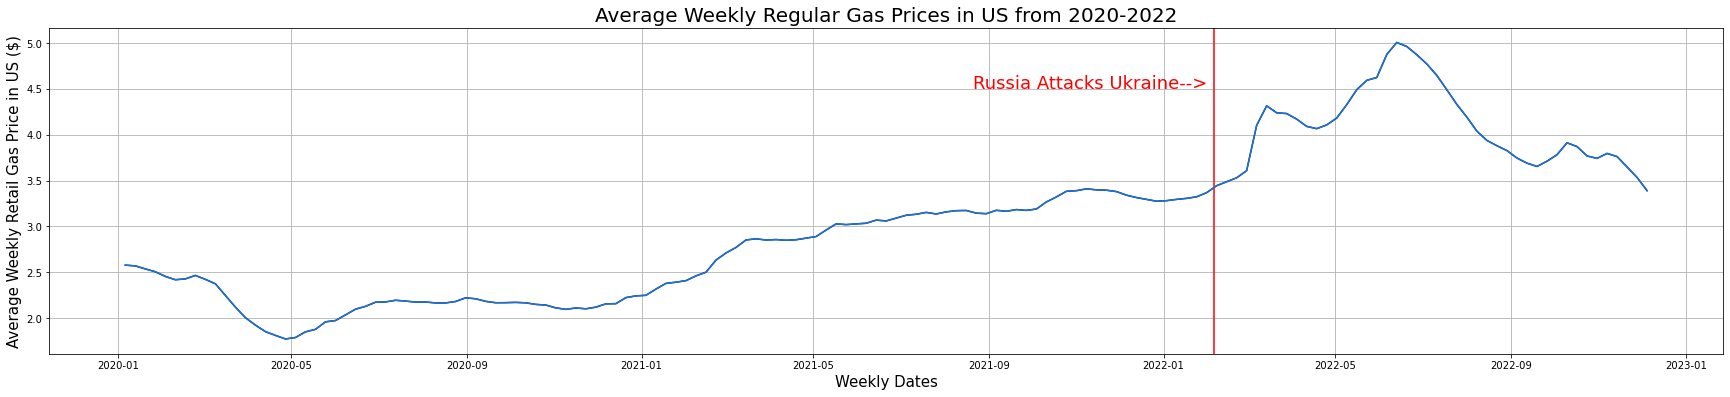

In [57]:
x_axis_reg = final_reg_df['Date']
y_axis_reg = final_reg_df["Average Weekly Retail Gas Price in US"]
fig1, ax1 = plt.subplots(figsize=(30,6))
reg_gas = plt.plot(x_axis_reg,y_axis_reg,color='b')

plt.grid()
rus_attacks = plt.axvline(x=19028, color='r', label='Russia Attacks Ukraine')
plt.annotate("Russia Attacks Ukraine-->",(18860,4.5),fontsize=18,color="red")
plt.xlabel("Weekly Dates",fontsize=15)
plt.ylabel("Average Weekly Retail Gas Price in US ($)",fontsize=15)
plt.title("Average Weekly Regular Gas Prices in US from 2020-2022",fontsize=20)
plt.plot(x_axis_reg,y_axis_reg)

#plt.savefig("../Presentation Images/reg_gas.png")
plt.show()

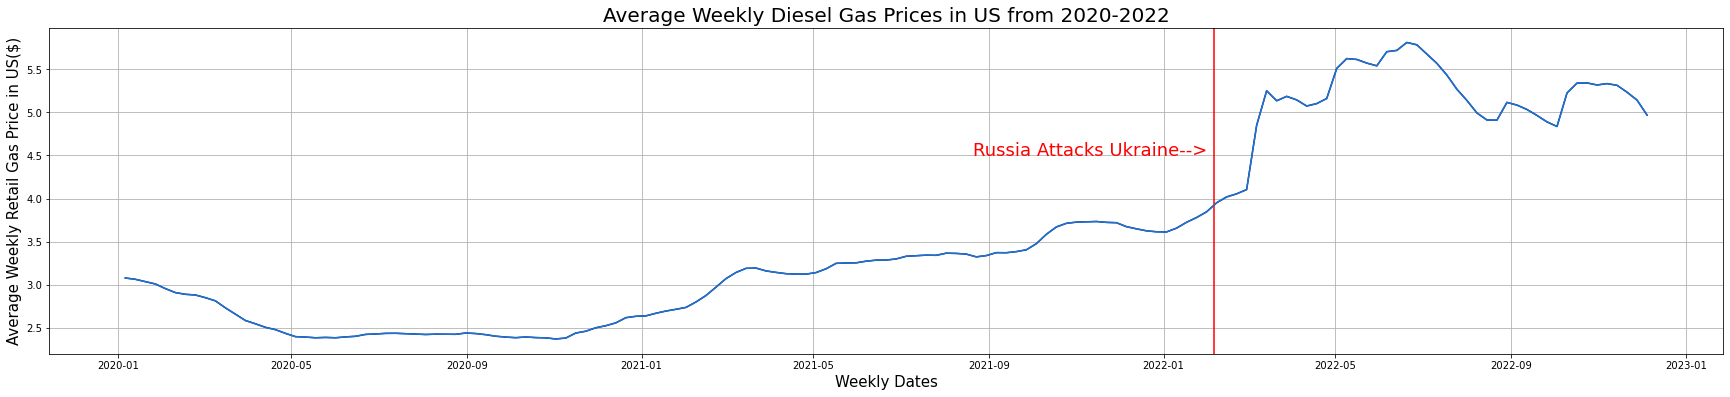

In [54]:
x_axis_dies = final_dies_df['Date']
y_axis_dies = final_dies_df["Average Weekly Retail Gas Price in US"]
fig1, ax1 = plt.subplots(figsize=(30,6))
reg_gas = plt.plot(x_axis_dies,y_axis_dies,color='b')

plt.grid()
rus_attacks = plt.axvline(x=19028, color='r', label='Russia Attacks Ukraine')
plt.annotate("Russia Attacks Ukraine-->",(18860,4.5),fontsize=18,color="red")
plt.xlabel("Weekly Dates",fontsize=15)
plt.ylabel("Average Weekly Retail Gas Price in US($)",fontsize=15)
plt.title("Average Weekly Diesel Gas Prices in US from 2020-2022",fontsize=20)
plt.plot(x_axis_dies,y_axis_dies)

#plt.savefig("../Presentation Images/dies_gas.png")
plt.show()

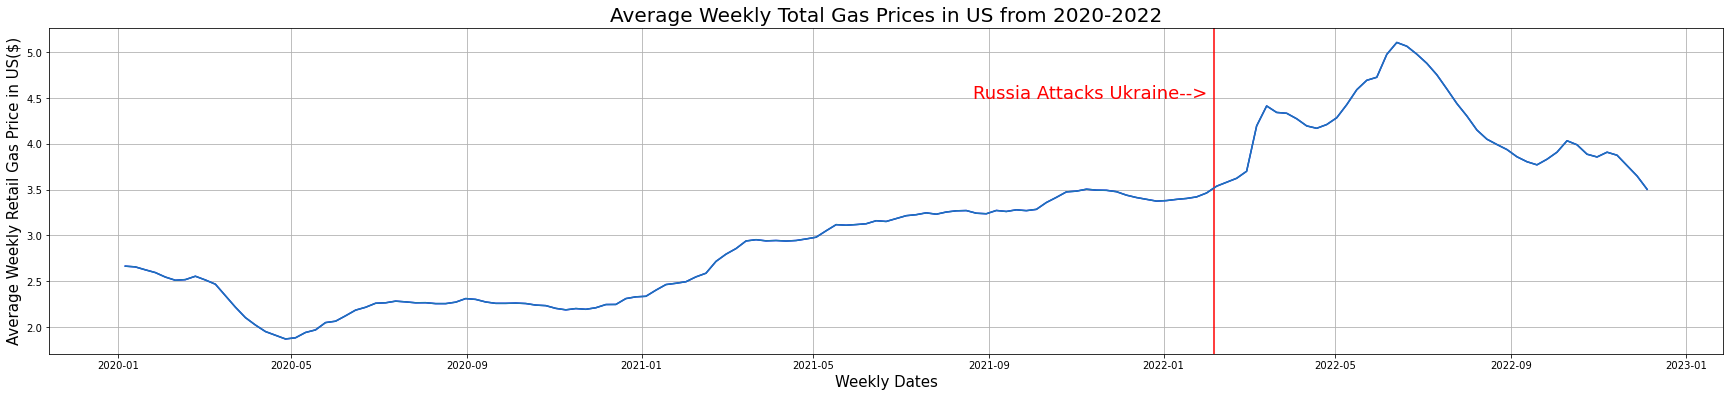

In [59]:
x_axis_tot = final_tot_df['Date']
y_axis_tot = final_tot_df["Average Weekly Retail Gas Price in US"]
fig1, ax1 = plt.subplots(figsize=(30,6))
reg_gas = plt.plot(x_axis_tot,y_axis_tot,color='b')

plt.grid()
rus_attacks = plt.axvline(x=19028, color='r', label='Russia Attacks Ukraine')
plt.annotate("Russia Attacks Ukraine-->",(18860,4.5),fontsize=18,color="red")
plt.xlabel("Weekly Dates",fontsize=15)
plt.ylabel("Average Weekly Retail Gas Price in US($)",fontsize=15)
plt.title("Average Weekly Total Gas Prices in US from 2020-2022",fontsize=20)
plt.plot(x_axis_tot,y_axis_tot)

#plt.savefig("../Presentation Images/tot_gas.png")
plt.show()

In [64]:
Start = final_tot_df["Date"] == "2021-09-06"
start_spot = final_tot_df[Start]
print(start_spot)

         Date  Average Weekly Retail Gas Price in US
87 2021-09-06                                  3.273


In [65]:
Start = final_tot_df["Date"] == "2022-09-05"
start_spot = final_tot_df[Start]
print(start_spot)

          Date  Average Weekly Retail Gas Price in US
139 2022-09-05                                  3.859


In [67]:
zoomed_total = final_tot_df.iloc[87:139,:]
zoomed_regular = final_reg_df.iloc[87:139,:]
zoomed_diesel = final_dies_df.iloc[87:139,:]

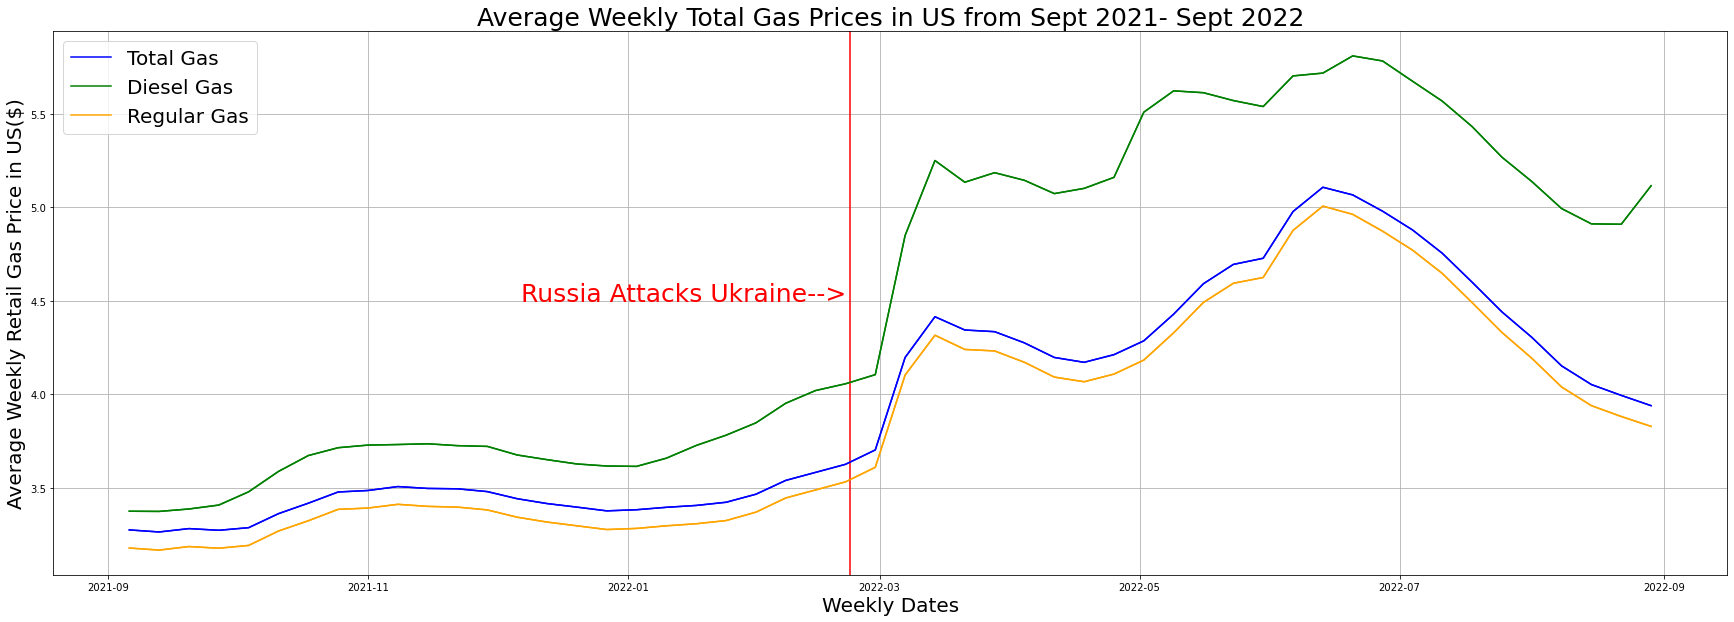

In [91]:
x_axis_tot = zoomed_total['Date']
y_axis_tot = zoomed_total["Average Weekly Retail Gas Price in US"]
fig1, ax1 = plt.subplots(figsize=(30,10))
zoom_tot_gas, = plt.plot(x_axis_tot,y_axis_tot,color='b',label="Total Gas")

x_axis_dies = zoomed_diesel['Date']
y_axis_dies = zoomed_diesel["Average Weekly Retail Gas Price in US"]
zoom_dies_gas, = plt.plot(x_axis_dies,y_axis_dies,color='g',label="Diesel Gas")

x_axis_reg = zoomed_regular['Date']
y_axis_reg = zoomed_regular["Average Weekly Retail Gas Price in US"]
zoom_reg_gas, = plt.plot(x_axis_reg,y_axis_reg,color='orange',label="Regular Gas")

plt.grid()
rus_attacks = plt.axvline(x=19045, color='r', label='Russia Attacks Ukraine')
plt.annotate("Russia Attacks Ukraine-->",(18968,4.5),fontsize=25,color="red")
plt.xlabel("Weekly Dates",fontsize=20)
plt.ylabel("Average Weekly Retail Gas Price in US($)",fontsize=20)
plt.title("Average Weekly Total Gas Prices in US from Sept 2021- Sept 2022",fontsize=25)
plt.plot(x_axis_tot,y_axis_tot,color='b')
plt.plot(x_axis_dies,y_axis_dies,color='g')
plt.plot(x_axis_reg,y_axis_reg,color='orange')
plt.legend(handles=[zoom_tot_gas, zoom_dies_gas,zoom_reg_gas], loc="upper left",fontsize=20)
#plt.savefig("../Presentation Images/all_gas.png")
plt.show()